In [1]:
import numpy as np
import pandas as pd

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#%cd /content/gdrive/MyDrive/Colab\ Notebooks

**Importing Resumes and Job Description dataset and EDA**

In [4]:
## Resume dataset
resumes = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
resumes.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
resumes['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [8]:
## Job dataset
jobs = pd.read_csv('Indeed_10k.csv')

In [9]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Name        10000 non-null  object 
 2   Company     10000 non-null  object 
 3   City        10000 non-null  object 
 4   Ratings     6224 non-null   float64
 5   Summary     10000 non-null  object 
 6   Date        10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [10]:
jobs.head(5)

,Unnamed: 0,Name,Company,City,Ratings,Summary,Date
0,0,Entry level Software Engineer,CapitalPlanHoldings,"San Francisco, CA",NaN,"Programming experience using C#, C++, or Java ...",2 days ago
1,1,Junior Software Engineer,FormSwift,"San Francisco, CA",NaN,Building new product features across the back ...,30+ days ago
2,2,Software Engineer,Microsoft,"San Francisco, CA",4.2,Yammer-THE social network for workplace-is hir...,5 days ago
3,3,Software Engineer - Entry Level,Pathrise,"San Francisco Bay Area, CA",NaN,You'll be expected to deliver in an agile envi...,2 days ago
4,4,Software Engineer (Python),Imgix,"San Francisco, CA",NaN,Comfortable developing in Python (or similar)....,5 days ago


In [11]:
jobs['Summary'][0]

'Programming experience using C#, C++, or Java are preferred.You will be part of a team of passionate software developers who use Agile methodologies to build…'

In [12]:
### maximum sequence lenght of any job in job dataset
max(jobs['Summary'].str.split(' ').apply(len))

431

In [13]:
### maximum sequence lenght of any resume in resume dataset
max(resumes['Resume'].str.split(' ').apply(len))

2069

In [14]:
### EDA - types of resume 
resumes.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [15]:
### types of jobs
jobs.Name.unique()

array(['Entry level Software Engineer', 'Junior Software Engineer',
       'Software Engineer', 'Software Engineer - Entry Level',
       'Software Engineer (Python)', 'SOFTWARE ENGINEER',
       "AppD Software Engineer Bachelor's (Intern) United States",
       'Software Engineer - University Graduate',
       'Entry Level DevOps Engineer', 'Software Engineer- Capacity',
       'Software Engineer, Videos', 'Intern, Software Engineering',
       'Software Engineering Intern', 'Junior Developer',
       'New Graduate: Software Engineering', 'Junior Full Stack Engineer',
       'Software Engineer, Square Capital',
       'Internship: Social - Software Engineer Summer Intern',
       'Summer 2020 Intern - Software Engineer',
       'Software Engineer - Subscriptions',
       'Software Development Engineer II #0000',
       'Software Development Engineer',
       'Entry Level Accenture Technology Software Engineer Associate',
       'Software Engineer Internship',
       'Software Engineer

In [16]:
!pip install WordCloud

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.


***EDA for Resume Dataset***

In [17]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
resumes['Cleaned_Resume']= ''

In [19]:
print ("Resume Categories")
print (resumes['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Data Science                 40
Operations Manager           40
Sales                        40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

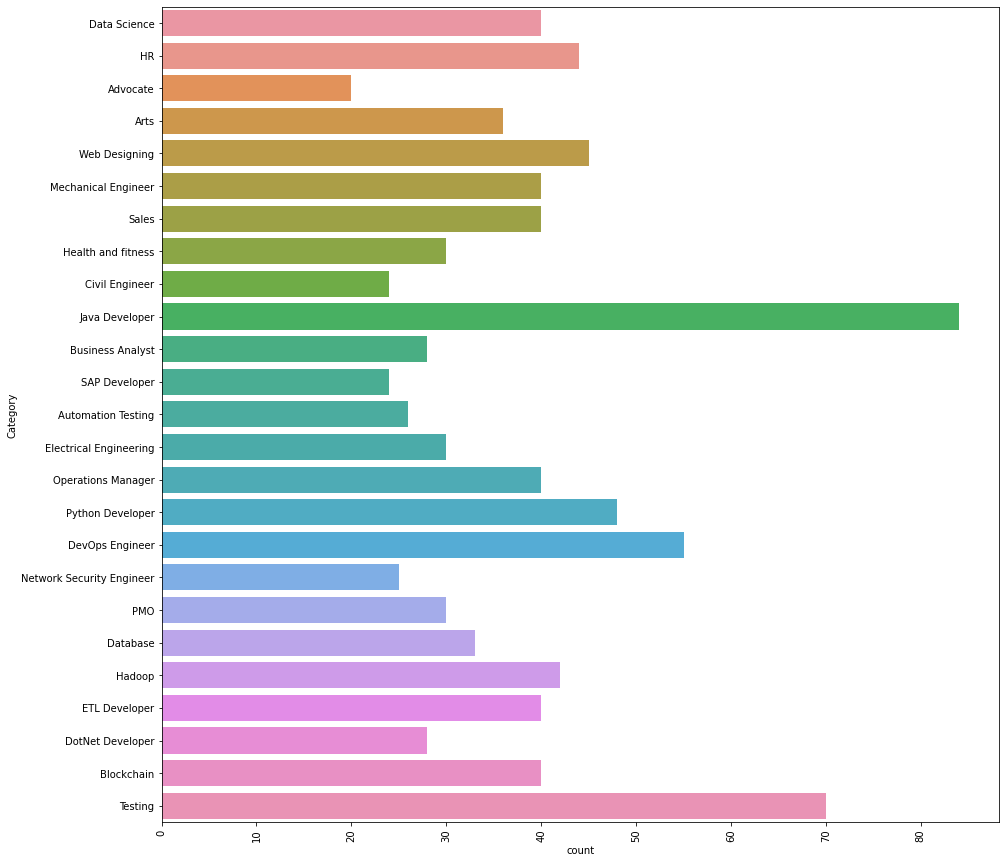

In [20]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumes)

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
## Data cleaning for Keywords column

from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords

#Data cleaning
resumes['Resume'] = resumes['Resume'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
resumes['Resume'] = resumes['Resume'].replace("  ", " ")

resumes['Resume'] = resumes['Resume'].replace(r'<ed>','', regex = True)
resumes['Resume'] = resumes['Resume'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)

# convert keys to lowercase
resumes['Resume'] = resumes['Resume'].str.lower()

#remove user mentions
resumes['Resume'] = resumes['Resume'].replace(r'^(@\w+)',"", regex=True)

#remove 'rt' in the beginning
resumes['Resume'] = resumes['Resume'].replace(r'^(rt @)',"", regex=True)

#remove_symbols
resumes['Resume'] = resumes['Resume'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

#remove punctuations 
resumes['Resume'] = resumes['Resume'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

#remove_URL(x):
resumes['Resume'] = resumes['Resume'].replace(r'https.*$', "", regex = True)

#remove 'amp' in the text
resumes['Resume'] = resumes['Resume'].replace(r'amp',"", regex = True)

#remove words of length 1 or 2 
resumes['Resume'] = resumes['Resume'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

#remove extra spaces in the keywords
resumes['Resume'] = resumes['Resume'].replace(r'^\s+|\s+$'," ", regex=True)


words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]

#remove stopwords and words_to_remove
stop_words = set(stopwords.words('english'))
mystopwords = [stop_words, "via", words_remove]

resumes['Resume'] = resumes['Resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
resumes['Cleaned_Resume'] = resumes['Resume']

/Users/abhishek/miniforge3/envs/test/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/abhishek/miniforge3/envs/test/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:178: FutureWarning: Possible nested set at position 1
  re.compile(obj)


In [23]:
# clean resume column for data analysis
import re
def cleanResume_bert_input(x):
  ### Light
  x = x.lower() # lowercase everything
  x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
  x = re.sub(r'https*\S+', ' ', x) # remove links
  x = re.sub(r'http*\S+', ' ', x)
  # cleaning up text
  x = re.sub(r'\'\w+', '', x) 
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  x = re.sub(r'\s[^\w\s]\s', '', x)
  return x
resumes['Cleaned_Resume_bert_input'] = pd.read_csv('UpdatedResumeDataSet.csv').Resume.apply(lambda x: cleanResume_bert_input(x))

In [24]:
resumes.head()

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n..."
1,Data Science,education details may 2013 may 2017 uitrgpv da...,education details may 2013 may 2017 uitrgpv da...,education details may to may b.e uit-rgpv data...
2,Data Science,areas interest deep learning control system de...,areas interest deep learning control system de...,"areas of interest deep learning, control syste..."
3,Data Science,skills python sap hana tableau sap hana sql sa...,skills python sap hana tableau sap hana sql sa...,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...,"education details mca ymcaust, faridabad, hary..."


In [25]:
resumes['Resume'] = resumes['Cleaned_Resume']

In [26]:
len(resumes['Resume'][0])

4316

In [27]:
len(resumes)

962

In [28]:
#getting the entire resume text
corpus=" "
for i in range(0,962):
    corpus= corpus+ resumes["Cleaned_Resume"][i]

In [29]:
corpus[1000:2500]

'run analytics and generate reports core member team helped developing automated review platform tool from scratch for assisting discovery domain this tool implements predictive coding and topic modelling automating reviews resulting reduced labor costs and time spent during the lawyers review understand the end end flow the solution doing research and development for classification models predictive analysis and mining the information present text data worked analyzing the outputs and precision monitoring for the entire tool tar assists predictive coding topic modelling from the evidence following standards developed the classifier models order identify red flags and fraudrelated issues tools technologies python scikitlearn tfidf word2vec doc2vec cosine similarity bayes lda nmf for topic modelling vader and text blob for sentiment analysis matplot lib tableau dashboard for reporting multiple data science and analytic projects usa clients text analytics motor vehicle customer review da

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
### tokenize to find patterns in data
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
#tokens = nltk.word_tokenize(corpus)
len(tokens)

350210

In [32]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [35]:
len(words_new)

299257

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
## lematization to standardize tokens and avoid duplicates with same meaning
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [38]:
## no of token lematized in sample
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 288
Number of words not Lemmatized= 1544


In [39]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

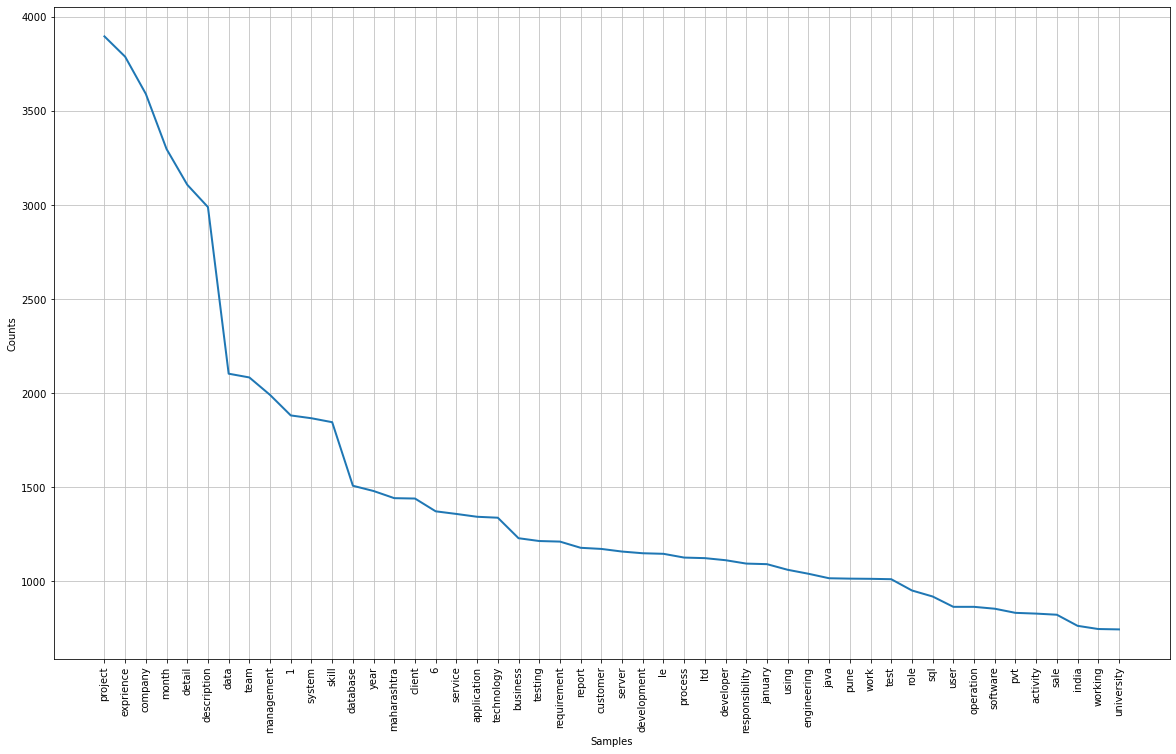

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
#The frequency distribution of the words
#freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(50)

In [41]:
## most common words in resume
mostcommon = freq_dist.most_common(50)

In [42]:
mostcommon

[('project', 3897),
 ('exprience', 3789),
 ('company', 3591),
 ('month', 3298),
 ('detail', 3108),
 ('description', 2989),
 ('data', 2103),
 ('team', 2083),
 ('management', 1990),
 ('1', 1881),
 ('system', 1866),
 ('skill', 1845),
 ('database', 1507),
 ('year', 1479),
 ('maharashtra', 1441),
 ('client', 1439),
 ('6', 1371),
 ('service', 1357),
 ('application', 1342),
 ('technology', 1337),
 ('business', 1228),
 ('testing', 1213),
 ('requirement', 1210),
 ('report', 1177),
 ('customer', 1171),
 ('server', 1157),
 ('development', 1148),
 ('le', 1145),
 ('process', 1125),
 ('ltd', 1122),
 ('developer', 1111),
 ('responsibility', 1093),
 ('january', 1090),
 ('using', 1060),
 ('engineering', 1039),
 ('java', 1015),
 ('pune', 1013),
 ('work', 1012),
 ('test', 1010),
 ('role', 950),
 ('sql', 918),
 ('user', 863),
 ('operation', 863),
 ('software', 853),
 ('pvt', 831),
 ('activity', 827),
 ('sale', 821),
 ('india', 762),
 ('working', 745),
 ('university', 743)]

In [43]:
#converting into string
res=' '.join([i for i in lem_words if not i.isdigit()])

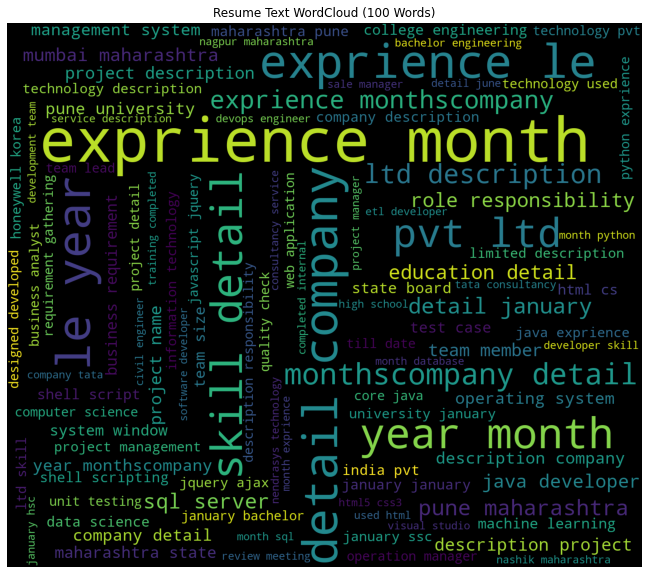

In [44]:
## wordcloud to get sense of words based on frequency
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

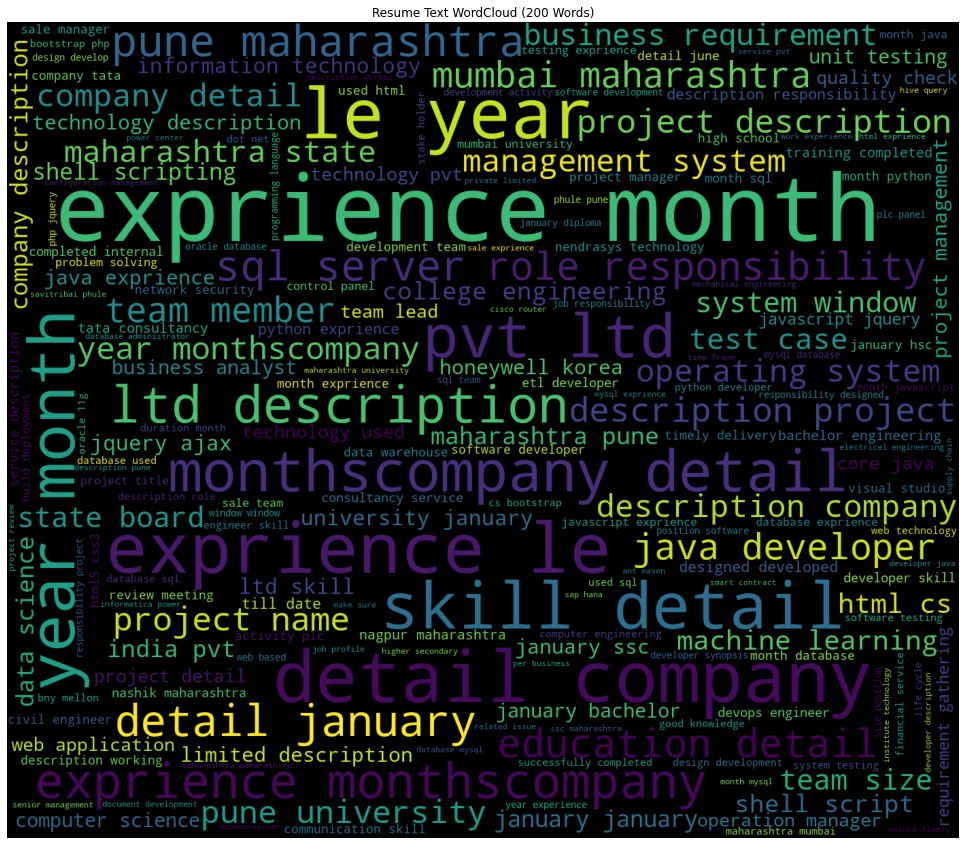

In [45]:
## plotting 200 words - mostly dataset looks to be IT skill set dataset from Maharashtra, india
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [46]:
## visualize words for sample category
data_science= resumes[resumes["Category"]=="Data Science"]
data_science.head()

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n..."
1,Data Science,education details may 2013 may 2017 uitrgpv da...,education details may 2013 may 2017 uitrgpv da...,education details may to may b.e uit-rgpv data...
2,Data Science,areas interest deep learning control system de...,areas interest deep learning control system de...,"areas of interest deep learning, control syste..."
3,Data Science,skills python sap hana tableau sap hana sql sa...,skills python sap hana tableau sap hana sql sa...,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...,"education details mca ymcaust, faridabad, hary..."


In [47]:
len(data_science)

40

In [48]:
#getting the entire resume text
data_science_corpus=" "
for i in range(0,40):
    data_science_corpus= data_science_corpus+ data_science["Cleaned_Resume"][i]
data_science_corpus=data_science_corpus.lower()

In [49]:
words_data_science=data_science_corpus.split()

In [50]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_data_science_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_data_science_new all words that are in words but not in sw
for word in words_data_science:
    if word not in stopwords:
        words_data_science_new.append(word)

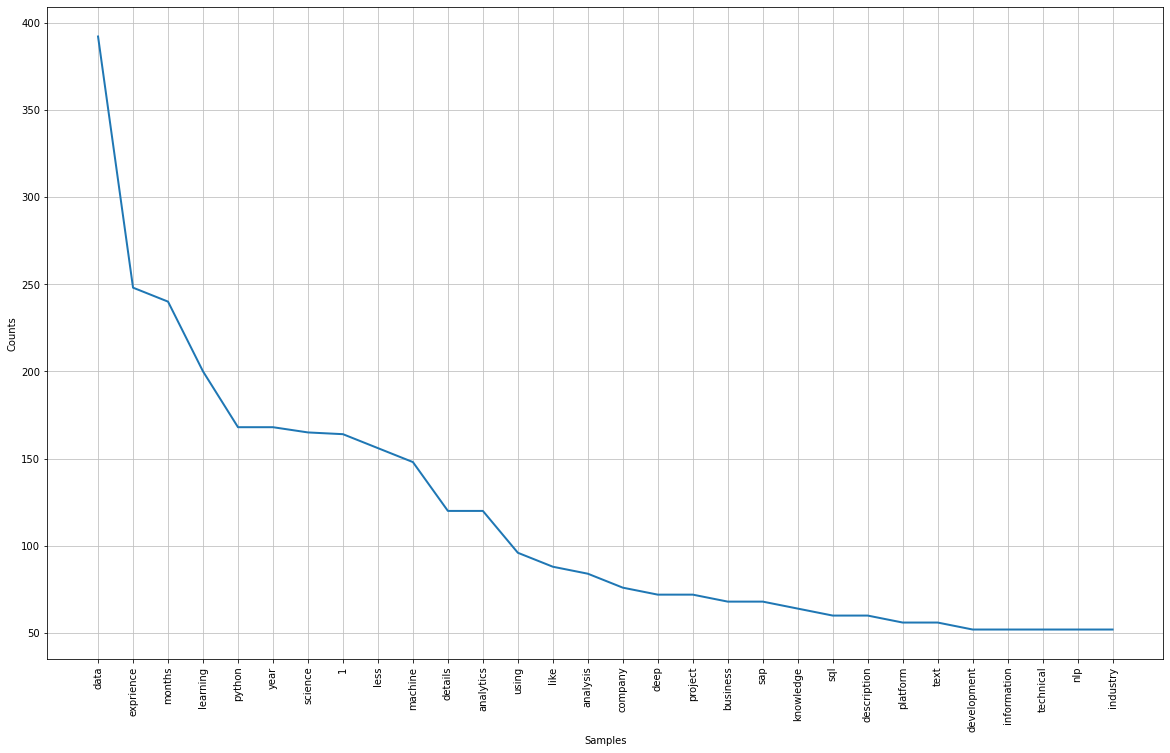

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
#The frequency distribution of the words
freq_dist_data_science = nltk.FreqDist(words_data_science_new)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_data_science.plot(30)

In [52]:
#converting into string
res_data_science=' '.join([i for i in words_data_science_new if not i.isdigit()])

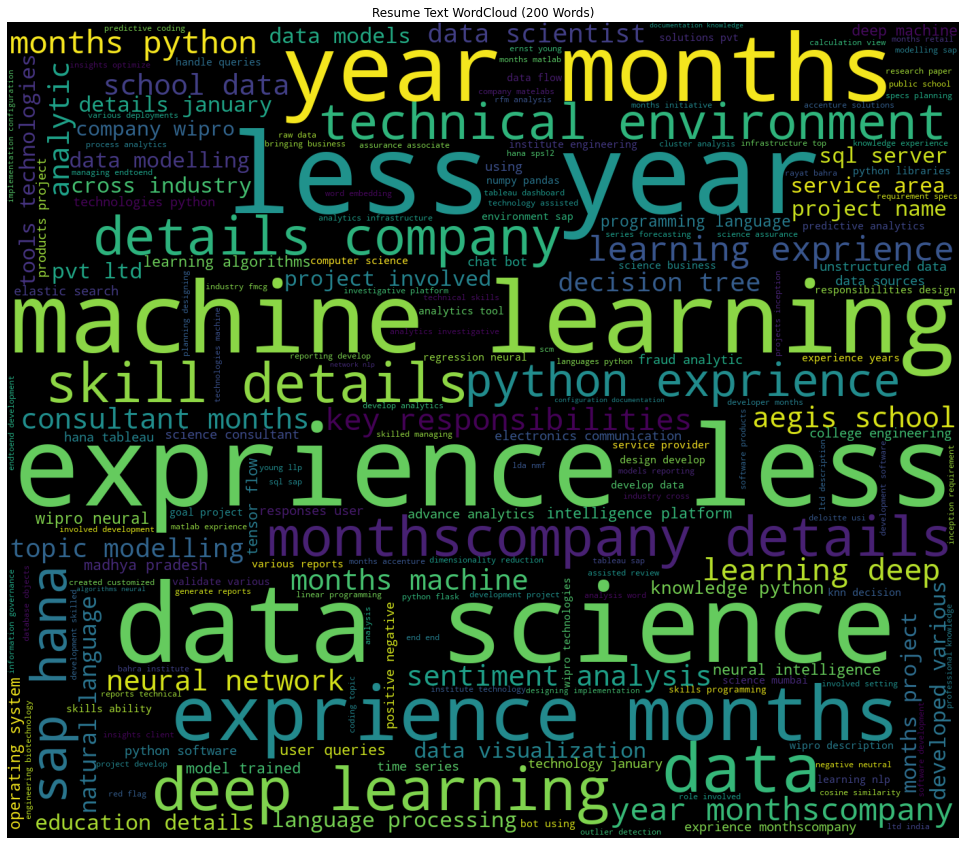

In [53]:
## word cloud shows machine learning, deep learning, python are more frequent in data science resumes
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_data_science)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [54]:
words_data_science.count("python")

168

***EDA for Job Dataset***

jobs Categories


<AxesSubplot:>

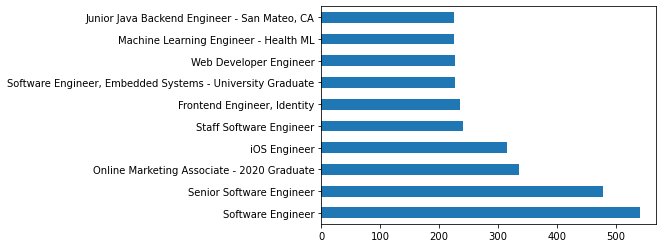

In [55]:
print ("jobs Categories")
jobs['Name'].value_counts()[0:10].plot(kind='barh')

In [56]:
jobs['Name'].nunique()

562

In [57]:
jobs['Cleaned_Summary'] = ''

In [58]:
## Data cleaning for Keywords column

from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords

#Data cleaning
jobs['Summary'] = jobs['Summary'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
jobs['Summary'] = jobs['Summary'].replace("  ", " ")

jobs['Summary'] = jobs['Summary'].replace(r'<ed>','', regex = True)
jobs['Summary'] = jobs['Summary'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)

# convert keys to lowercase
jobs['Summary'] = jobs['Summary'].str.lower()

#remove user mentions
jobs['Summary'] = jobs['Summary'].replace(r'^(@\w+)',"", regex=True)

#remove 'rt' in the beginning
jobs['Summary'] = jobs['Summary'].replace(r'^(rt @)',"", regex=True)

#remove_symbols
jobs['Summary'] = jobs['Summary'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

#remove punctuations 
jobs['Summary'] = jobs['Summary'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

#remove_URL(x):
jobs['Summary'] = jobs['Summary'].replace(r'https.*$', "", regex = True)

#remove 'amp' in the text
jobs['Summary'] = jobs['Summary'].replace(r'amp',"", regex = True)

#remove words of length 1 or 2 
jobs['Summary'] = jobs['Summary'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

#remove extra spaces in the keywords
jobs['Summary'] = jobs['Summary'].replace(r'^\s+|\s+$'," ", regex=True)


words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]

#remove stopwords and words_to_remove
stop_words = set(stopwords.words('english'))
mystopwords = [stop_words, "via", words_remove]

jobs['Summary'] = jobs['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
jobs['Cleaned_Summary'] = jobs['Summary']

In [59]:
# clean job column for data analysis
import re


def cleanJob_bert_input(x):
  ### Light
  x = x.lower() # lowercase everything
  x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
  x = re.sub(r'https*\S+', ' ', x) # remove links
  x = re.sub(r'http*\S+', ' ', x)
  # cleaning up text
  x = re.sub(r'\'\w+', '', x) 
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  x = re.sub(r'\s[^\w\s]\s', '', x)
  return x
jobs['Cleaned_Summary_bert_input'] = pd.read_csv('Indeed_10k.csv').Summary.apply(lambda x: cleanJob_bert_input(x))

In [60]:
re.sub(r'[^\w\s]', '', " passes?! ")

' passes '

In [61]:
## getting the entire resume text
corpus=" "
for i in range(0,10000):
    corpus= corpus+ jobs["Cleaned_Summary"][i]

In [62]:
    ### tokenize to find patterns in data
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
#tokens = nltk.word_tokenize(corpus)
len(tokens)

335658

In [63]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [64]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [65]:

## lematization to standardize tokens and avoid duplicates with same meaning
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)


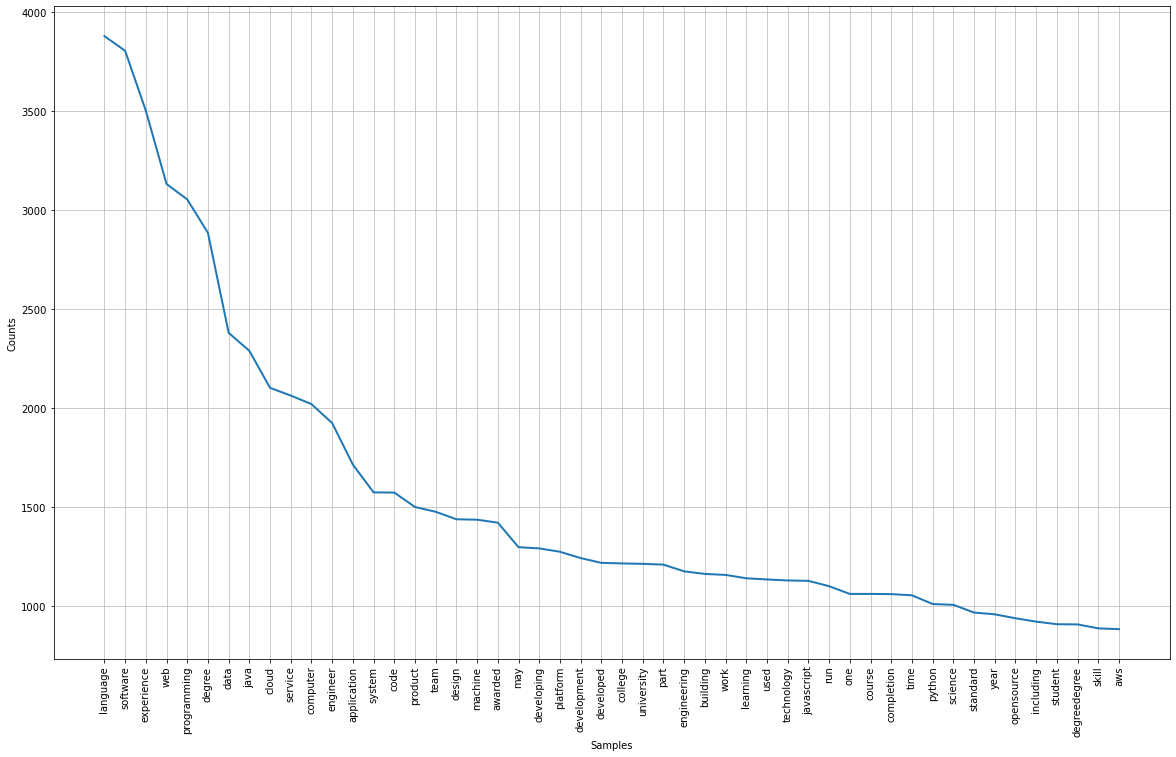

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(50)

In [67]:
## most common words in resume
mostcommon = freq_dist.most_common(50)

In [68]:
mostcommon

[('language', 3879),
 ('software', 3805),
 ('experience', 3502),
 ('web', 3132),
 ('programming', 3054),
 ('degree', 2885),
 ('data', 2380),
 ('java', 2289),
 ('cloud', 2102),
 ('service', 2063),
 ('computer', 2020),
 ('engineer', 1924),
 ('application', 1714),
 ('system', 1574),
 ('code', 1573),
 ('product', 1500),
 ('team', 1476),
 ('design', 1438),
 ('machine', 1436),
 ('awarded', 1421),
 ('may', 1297),
 ('developing', 1291),
 ('platform', 1274),
 ('development', 1242),
 ('developed', 1218),
 ('college', 1215),
 ('university', 1213),
 ('part', 1209),
 ('engineering', 1175),
 ('building', 1162),
 ('work', 1157),
 ('learning', 1140),
 ('used', 1134),
 ('technology', 1129),
 ('javascript', 1127),
 ('run', 1100),
 ('one', 1061),
 ('course', 1061),
 ('completion', 1060),
 ('time', 1054),
 ('python', 1010),
 ('science', 1006),
 ('standard', 967),
 ('year', 958),
 ('opensource', 938),
 ('including', 921),
 ('student', 908),
 ('degreedegree', 907),
 ('skill', 887),
 ('aws', 883)]

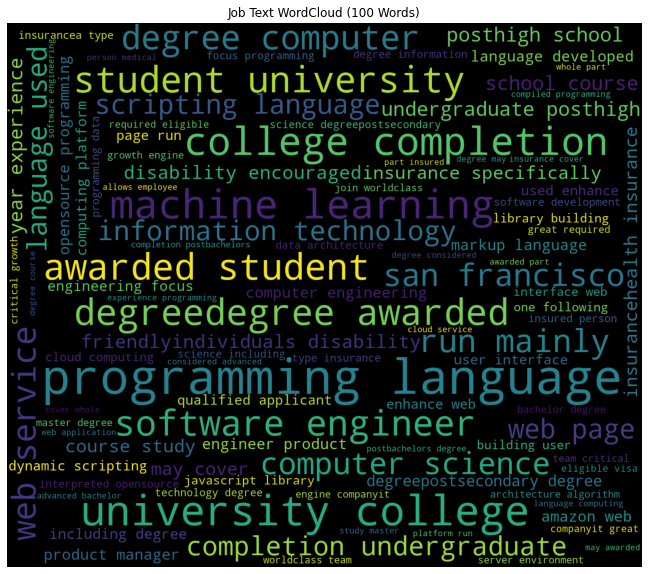

In [69]:
#converting into string
res=' '.join([i for i in lem_words if not i.isdigit()])


## wordcloud to get sense of words based on frequency
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Job Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

In [70]:
## MOst jobs need bachelor degree, programming knowledge 

In [71]:
jobs['Summary'] = jobs['Cleaned_Summary']

In [72]:
!pip install sentencepiece

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.


**SENTENSE BERT Based Resume Ranking Model**

In [73]:
### Install sentense BERT
!pip install -U sentence-transformers

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.


In [74]:
### Download checkpoint weights of all-MiniLM-L6-v2
from sentence_transformers import SentenceTransformer


In [75]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [76]:
#model.save('flask-starter-project-master/models/')

In [77]:
import joblib
import os.path
from os import path
### create BERT representational embedding of Resumes
if not path.exists('embeddings_without_preprocess.npy'):
    embeddings = model.encode(resumes['Cleaned_Resume_bert_input'])
    ### Store embeddings for offline processing during prediction phase
    all_embeddings = np.array(embeddings)
    np.save('embeddings_without_preprocess.npy', all_embeddings)
else:
    embeddings = np.load('embeddings_without_preprocess.npy')


In [78]:
### create BERT representational embedding of Jobs
if not path.exists('job_embeddings_without_preprocess.npy'):
    job_embedding = model.encode(jobs['Cleaned_Summary_bert_input'])
    ### Store embeddings for offline processing during prediction phase
    job_all_embeddings = np.array(job_embedding)
    np.save('job_embeddings_without_preprocess.npy', job_all_embeddings)
else:
    job_embedding = np.load('job_embeddings_without_preprocess.npy')

In [79]:
from scipy import spatial
results = []
for emb in embeddings:
  results.append(1 - spatial.distance.cosine(job_embedding[0], emb))
temp = pd.DataFrame(resumes['Resume'])
temp['rank_score'] = results
temp.sort_values('rank_score',ascending=False)[0:10]['Resume']

604    total experience 15 years core expertise data ...
477    skills agile methodology scrum kanban extreme ...
458    skills agile methodology scrum kanban extreme ...
479    skills agile methodology scrum kanban extreme ...
475    skills agile methodology scrum kanban extreme ...
471    skills agile methodology scrum kanban extreme ...
466    skills agile methodology scrum kanban extreme ...
464    skills agile methodology scrum kanban extreme ...
462    skills agile methodology scrum kanban extreme ...
400    technical skills programming languages java se...
Name: Resume, dtype: object

**TF-IDF based Resume Ranking Model**

In [80]:
## append sample job to resume dataset to calculate TF-IDF and further find out most similar resumes for this JOB.. its handled better way further in notebook
sample = resumes['Resume'].append(pd.Series(jobs['Summary'][0]), ignore_index="True")

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(sample)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [82]:
sim_scores = list(enumerate(cosine_sim[962]))
    # Sort the resumes based on the similarity scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar resumes
sim_scores = sim_scores[1:11]
    # Get the resumes indices
resume_indices = [i[0] for i in sim_scores]

In [83]:
## Top 10 resumes with TF-IDF based model for 1st Job in dataset
resume_indices

[601, 608, 611, 614, 617, 620, 623, 626, 629, 632]

**Compare Job description with TF-IDF based sorted Resume and BERT based sorted Resume**

In [84]:
##TF-IDF based best resume
resumes['Resume'][601]

'core competencies ant maven git bitbucket jenkins linux ansible shell scripting requirement gathering continuous integration and continuous deployment software development life cycle software testing life cycle documentation reporting test reports skills primary skills devops methodologies programming languages core java version controls git bitbucket build tools ant maven cicd tools jenkins configuration management ansible scripting shell script application servers apache tomcat servereducation details june 2015 june 2017 masters science information technology hyderabad telangana jntu devops engineer devops engineer nendrasys technologies pvt ltd skill details deployment exprience 27 months git exprience 27 months documentation exprience 26 months change management exprience 10 months configuration management exprience 10 monthscompany details company nendrasys technologies pvt ltd description date project description the scope the project design develop ecommerce product features fo

In [85]:
##BERT based best resume
resumes['Resume'][604]

'total experience 15 years core expertise data base design php python mysql javascript html 5 ajax jquery xml agile methodology devops methodology scrum framework jira tool git bitbucket anjular 1 angular 2 core java j2ee education details april 2004 mcm computer management pune maharashtra pune university april 1998 bsc maths kerala university project manager project manager skill details data base design php python mysql javascript html ajax xml agile methodology devops methodology scrum framework jira tool git bitbucket jquery angularjs amazon mws bootstrap nodejs laravel scrum exprience 120 monthscompany details company knoxed infotech pvt ltd description client interaction maintain work processes creates project plans through agile model methodology maintains project objectives working with multiprofiled teams technical and non technical stakeholders monitors production and quality customerstakeholdersponsor standards conduct office management tasks ensuring that the daytoday oper

In [86]:
##Input JD
jobs['Summary'][0]

'programming experience using java are preferredyou will part team passionate software developers who use agile methodologies build'

**Evaluation of Results using ROUGE**

In [87]:
!pip install rouge

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.


In [88]:
## Compare resume with original JD to come up with matching score
from rouge import Rouge 
job = jobs['Summary'][0]
res = resumes['Resume'][604]
res_tfidf = resumes['Resume'][601]
rouge = Rouge()
scores_bert = rouge.get_scores(job, res)
scores_tfidf = rouge.get_scores(job, res_tfidf)

In [89]:
## BERT based output ROUGE score
scores_bert

[{'rouge-1': {'r': 0.023923444976076555,
   'p': 0.29411764705882354,
   'f': 0.04424778621935943},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.023923444976076555,
   'p': 0.29411764705882354,
   'f': 0.04424778621935943}}]

In [90]:
## TF_IDF based output ROUGE score
scores_tfidf

[{'rouge-1': {'r': 0.03180212014134275,
   'p': 0.5294117647058824,
   'f': 0.0599999989308889},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.024734982332155476,
   'p': 0.4117647058823529,
   'f': 0.04666666559755558}}]

**Common Utilities and Evaluation over sample JDs**

In [91]:
from nltk.corpus import stopwords
def removeStopWords(text):
    words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                    "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                    "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                    "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                    "have","last","with","this","that","such","when","been","says","will","also","where","why",
                    "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                    "rt", "p","the","th", "n", "was"]

    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_remove]

    return ' '.join([word for word in text.split() if word not in mystopwords])



In [92]:
##### TF_IDF Features based model using Cosine similarity ######
sample_total = resumes['Resume'].append(jobs['Summary'], ignore_index="True")
tfidf_total = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix_total = tfidf_total.fit_transform(sample_total)

# Generate the cosine similarity matrix
cosine_sim_total = linear_kernel(tfidf_matrix_total, tfidf_matrix_total)

def calculateTFIDF(job_index):
  sim_scores_total = list(enumerate(cosine_sim_total[job_index]))
    # Sort the resumes based on the similarity scores
  sim_scores_total = sorted(sim_scores_total, key=lambda x: x[1], reverse=True)
  # Get the resume indices
  resume_indices_total = [i[0] for i in sim_scores_total if i[0]<len(resumes['Resume'])]
  # return top 10 resumes matching input job id
  return resume_indices_total[0:10]



In [93]:
### calling TF-IDF utility
calculateTFIDF(962)

[601, 608, 611, 614, 617, 620, 623, 626, 629, 632]

In [94]:
#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
from gensim.parsing.preprocessing import remove_stopwords
rouge = Rouge()
def calculateROGUE(job_index):
  res_tfidf = calculateTFIDF(job_index)
  scores_tfidf = []
  job_description = jobs['Summary'][job_index-len(resumes['Resume'])]
  for res_index in res_tfidf:
    res_tfidf = resumes['Resume'][res_index]
    scores_tfidf.append(rouge.get_scores(removeStopWords(res_tfidf), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_tfidf)/len(scores_tfidf)

In [95]:
set(removeStopWords(resumes['Resume'][601]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'build',
 'developers',
 'experience',
 'java',
 'methodologies',
 'programming',
 'software',
 'team',
 'using'}

In [96]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(3000)

3000


In [97]:
#### calculate for ROGUE for all jobs - top 10 resumes
fun = np.vectorize(calculateROGUE)
index = np.arange(962,1062,1)
final_tfidf_rogue_arr = fun(index)

In [98]:
#### average ROGUE for TF_IDF over samples
sum(final_tfidf_rogue_arr)/len(final_tfidf_rogue_arr)

0.2909288568672468

In [99]:
def calculateBERTRanks(job_index):
  results = []
  for emb in embeddings:
    results.append(1 - spatial.distance.cosine(job_embedding[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateBERTROGUE(job_index):
  res_bert = calculateBERTRanks(job_index)
  scores_bert = []
  job_description = jobs['Cleaned_Summary_bert_input'][job_index]
  for res_index in res_bert:
    res_bert = resumes['Cleaned_Resume_bert_input'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [100]:
calculateBERTRanks(0)

[604]

In [101]:
set(removeStopWords(resumes['Resume'][400]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'are', 'java', 'programming', 'using'}

In [102]:
#### calculate for ROGUE for all jobs - top 10 resumes
fun = np.vectorize(calculateBERTROGUE)
index = np.arange(0,100,1)
final_bert_rogue_arr = fun(index)

In [103]:
#### average ROGUE for BERT over samples
sum(final_bert_rogue_arr)/len(final_bert_rogue_arr)

0.27928995152407454

**Utility : Returns top 10 resumes from dataset for given JD**

In [104]:
#### Resume recommender using BERT
from scipy import spatial
def resumeRecommenderUsingBERT(job):
  job_embed = model.encode(job)
  res = []
  for emb in embeddings:
    res.append(1 - spatial.distance.cosine(job_embed, emb))
  temp = pd.DataFrame(resumes)
  temp['rank_score'] = res
  return temp.sort_values('rank_score',ascending=False)[0:10]

In [105]:
### New Job description - sent as input to utlity
resumeRecommenderUsingBERT("Programming experience using python, boosting, bagging, regression, recommender systems.You will be part of a team of passionate software developers who use Agile methodologies to build…")

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input,rank_score
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n...",0.644411
30,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n...",0.644411
20,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n...",0.644411
10,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n...",0.644411
604,DevOps Engineer,total experience 15 years core expertise data ...,total experience 15 years core expertise data ...,total it experience years. core expertise in d...,0.582019
574,Python Developer,operating systems windows others excel office ...,operating systems windows others excel office ...,"operating systems: windows others: ms excel, ...",0.566666
562,Python Developer,operating systems windows others excel office ...,operating systems windows others excel office ...,"operating systems: windows others: ms excel, ...",0.566666
580,Python Developer,operating systems windows others excel office ...,operating systems windows others excel office ...,"operating systems: windows others: ms excel, ...",0.566666
586,Python Developer,operating systems windows others excel office ...,operating systems windows others excel office ...,"operating systems: windows others: ms excel, ...",0.566666
556,Python Developer,operating systems windows others excel office ...,operating systems windows others excel office ...,"operating systems: windows others: ms excel, ...",0.566666


In [106]:
### Resume recommender using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def resumeRecommenderUsingTFIDF(job):
  sample = resumes['Resume'].append(pd.Series(job), ignore_index="True")
  tfidf = TfidfVectorizer(stop_words='english')

  # Construct the TF-IDF matrix
  tfidf_matrix = tfidf.fit_transform(sample)

  # Generate the cosine similarity matrix
  cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
  sim_scores = list(enumerate(cosine_sim[len(resumes['Resume'])]))
      # Sort the resumes based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
      # Get the scores for 10 most similar resumes
  sim_scores = sim_scores[1:11]
      # Get the resumes indices
  resume_indices = [i[0] for i in sim_scores]
  return resumes.iloc[resume_indices]

In [107]:
resumeRecommenderUsingTFIDF("Programming experience using python, boosting, bagging, regression, recommender systems.You will be part of a team of passionate software developers who use Agile methodologies to build…")

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input,rank_score
554,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
560,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
566,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
572,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
578,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
584,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
590,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
596,Python Developer,technical skills languages python python frame...,technical skills languages python python frame...,technical skills: languages python python fram...,0.471615
601,DevOps Engineer,core competencies ant maven git bitbucket jenk...,core competencies ant maven git bitbucket jenk...,core competenciesantmavengitbitbucketjenkinsli...,0.437341
608,DevOps Engineer,core competencies ant maven git bitbucket jenk...,core competencies ant maven git bitbucket jenk...,core competenciesantmavengitbitbucketjenkinsli...,0.437341


In [108]:
### New Job description - sent as input to utlity
resumeRecommenderUsingBERT("aerospace")

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input,rank_score
197,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
187,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
217,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
207,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
222,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
202,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
192,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
212,Mechanical Engineer,education details january 2018 bachelors engin...,education details january 2018 bachelors engin...,education details january bachelor of engineer...,0.343544
22,Data Science,areas interest deep learning control system de...,areas interest deep learning control system de...,"areas of interest deep learning, control syste...",0.298602
2,Data Science,areas interest deep learning control system de...,areas interest deep learning control system de...,"areas of interest deep learning, control syste...",0.298602


In [109]:
resumes.iloc[197].Resume

'education details january 2018 bachelors engineering engineering mumbai maharashtra mgm college engineering diploma mechanical pune maharashtra mit president mechanical engineering students association president mechanical engineering students association skill details company details company full throttle description conducted iit bombay worked president mechanical engineering students association mesa mit pune company car race stepcone description paper project contest and exhibition conducted gmr instiute technology'

In [110]:
### New Job description - sent as input to utlity
resumeRecommenderUsingTFIDF("aerospace")

,Category,Resume,Cleaned_Resume,Cleaned_Resume_bert_input,rank_score
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,"skillsprogramming languages: python (pandas, n...",0.147454
1,Data Science,education details may 2013 may 2017 uitrgpv da...,education details may 2013 may 2017 uitrgpv da...,education details may to may b.e uit-rgpv data...,0.097660
2,Data Science,areas interest deep learning control system de...,areas interest deep learning control system de...,"areas of interest deep learning, control syste...",0.298602
3,Data Science,skills python sap hana tableau sap hana sql sa...,skills python sap hana tableau sap hana sql sa...,skills r python sap hana tableau sap hana sql ...,0.087908
4,Data Science,education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...,"education details mca ymcaust, faridabad, hary...",0.171960
5,Data Science,skills basics iot python matlab data science m...,skills basics iot python matlab data science m...,"skills c basics, iot, python, matlab, data sci...",0.163920
6,Data Science,skills python tableau data visualization studi...,skills python tableau data visualization studi...,skills python tableau data visualization r stu...,0.118171
7,Data Science,education details btech rayat and bahra instit...,education details btech rayat and bahra instit...,education details b.tech rayat and bahra insti...,0.212944
8,Data Science,personal skills ability quickly grasp technica...,personal skills ability quickly grasp technica...,personal skills ability to quickly grasp techn...,0.166441
9,Data Science,expertise data and quantitative analysis decis...,expertise data and quantitative analysis decis...,expertise data and quantitative analysis decis...,0.164284


In [111]:
###### Generate sample data for BERT fine tuning

In [111]:
def generateData():
    bertTrainData  = pd.DataFrame(columns=['resume1','resume2','match'])
    count = 0
    while count<100000: 
        count = count + 1
        sample = resumes.sample(n=2,replace=False,axis=0)
        match = 0
        if sample.iloc[0]['Category'] == sample.iloc[1]['Category']:
            match = 1
        else:
            match = 0
        bertTrainData = bertTrainData.append({'resume1':sample.iloc[0]['Cleaned_Resume_bert_input'],'resume2':sample.iloc[1]['Cleaned_Resume_bert_input'],'match':match},ignore_index=True)

    bertTrainData_1 = bertTrainData[bertTrainData['match']==1]
    bertTrainData_0 = bertTrainData[bertTrainData['match']==0].sample(n=4500,replace=False,axis=0)
    bertTrainData_new = pd.concat([bertTrainData_0,bertTrainData_1],ignore_index=True)
    bertTrainData_new = bertTrainData_new.sample(frac=1)
    bertTrainData_new.to_csv('bertTrain.csv')

In [112]:
if path.exists('bertTrain.csv'):
    bertTrainData_new = pd.read_csv('bertTrain.csv')
else:
    generateData()
bertTrainData_new['match'] = pd.to_numeric(bertTrainData_new['match'])

In [113]:
bertTrainData_new['match'].value_counts()

0    4500
1    4370
Name: match, dtype: int64

In [114]:
bertTrainData_new.drop(columns='Unnamed: 0',inplace=True)

In [115]:
bertTrainData_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8870 entries, 0 to 8869
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   resume1  8870 non-null   object
 1   resume2  8870 non-null   object
 2   match    8870 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 208.0+ KB


In [116]:
## Pre-Train BERT model

In [117]:
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, InputExample
from torch.utils.data import DataLoader


In [127]:
if path.exists('saved_model_2/'):
    model_finetune = SentenceTransformer("saved_model_2/")
else:
    model_finetune = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    train_examples = [InputExample(texts=[record[0], record[1]], label=record[2]) for record in bertTrainData_new.values]
    train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=2)
    train_loss = losses.ContrastiveLoss()
    model_finetune.fit([(train_dataloader, train_loss)], show_progress_bar=True, epochs=5)
    model_finetune.save('saved_model_2/tunedModel/')

In [128]:
tuned_emb = model_finetune.encode(resumes['Cleaned_Resume_bert_input'])
tuned_job_embedding = model_finetune.encode(jobs['Cleaned_Summary_bert_input'])

In [120]:
def calculateBERTRanks_tuned(job_index):
  results = []
  for emb in tuned_emb:
    results.append(1 - spatial.distance.cosine(tuned_job_embedding[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateBERTROGUE_tuned(job_index):
  res_bert = calculateBERTRanks_tuned(job_index)
  scores_bert = []
  job_description = jobs['Cleaned_Summary_bert_input'][job_index]
  for res_index in res_bert:
    res_bert1 = resumes['Cleaned_Resume_bert_input'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert1) , removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [121]:
calculateBERTRanks_tuned(9000)

[595]

In [122]:
set(removeStopWords(resumes['Resume'][590]).split()) & set(removeStopWords(jobs['Summary'][9000]).split())

{'deployment', 'design', 'develop', 'implementation', 'including'}

In [124]:

#### calculate for ROGUE for all jobs - top 10 resumes
fun = np.vectorize(calculateBERTROGUE_tuned)
index = np.arange(0,100,1)
final_bert_rogue_arr = fun(index)

In [125]:

#### average ROGUE for BERT over samples
sum(final_bert_rogue_arr)/len(final_bert_rogue_arr)

0.21367858918126786

In [112]:
model_finetune = model
tuned_emb = model_finetune.encode(resumes['Cleaned_Resume_bert_input'])
tuned_job_embedding = model_finetune.encode(jobs['Cleaned_Summary_bert_input'])

**Handling Sequence Length Problem Using Chunking**

In [113]:
## max sequence of chosen model is 256
model.parameters


<bound method Module.parameters of SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)>

In [114]:
## Chunk with 250 sequence length .. chosen less than max size to allow special tokens in BERT
def chunking(max_len, sent):
    tokenized_text = sent.lower().split(" ")
    # using list comprehension
    final = [tokenized_text[i * max_len:(i + 1) *max_len] for i in range((len(tokenized_text) + max_len - 1) // max_len)] 
    
    # join back to sentences for each of the chunks
    sent_chunk = []
    for item in final:
        sent_chunk.append(' '.join(item))
    return(sent_chunk)


In [115]:
## mean embedding
def meanEmbedding(resume):
  resume_chunks = chunking(250,resume)
  resume_chunks_emb = []
  for resume_chunk in resume_chunks:
    resume_chunks_emb.append(model_finetune.encode(resume_chunk))
  return np.mean(resume_chunks_emb,axis=0)

In [116]:
## average embedding for long sequence using chunking
mean_resume_embeddings = []
for resume in resumes['Cleaned_Resume_bert_input']:
  mean_resume_embeddings.append(meanEmbedding(resume))

In [119]:
np.save('mean_resume_embeddings.npy',mean_resume_embeddings)

In [133]:
def calculateBERTRanksWithMeanChunk(job_index):
  results = []
  for emb in mean_resume_embeddings:
    results.append(1 - spatial.distance.cosine(tuned_job_embedding[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateBERTROGUEWithMeanChunk(job_index):
  res_bert = calculateBERTRanksWithMeanChunk(job_index)
  scores_bert = []
  job_description = jobs['Cleaned_Summary_bert_input'][job_index]
  for res_index in res_bert:
    res_bert = resumes['Cleaned_Resume_bert_input'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [177]:
jobs.iloc[0]['Summary']

'programming experience using java are preferredyou will part team passionate software developers who use agile methodologies build'

In [134]:
calculateBERTRanksWithMeanChunk(0)

[449]

In [135]:
set(removeStopWords(resumes['Resume'][391]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'are', 'build', 'experience', 'java', 'software', 'team'}

In [137]:
  #### calculate for ROGUE for all jobs - top 10 resumes
fun_mean_chunk = np.vectorize(calculateBERTROGUEWithMeanChunk)
index = np.arange(0,100,1)
final_bert_rogue_arr_mean_chunk = fun_mean_chunk(index)

#### average ROGUE for BERT over samples
sum(final_bert_rogue_arr_mean_chunk)/len(final_bert_rogue_arr_mean_chunk)

0.30792633018445037

In [138]:
### Max embedding chunks
def maxEmbedding(resume):
  resume_chunks = chunking(250,resume)
  resume_chunks_emb = []
  for resume_chunk in resume_chunks:
    resume_chunks_emb.append(model_finetune.encode(resume_chunk))
  return np.amax(resume_chunks_emb,axis=0)

In [139]:
## max embedding for long sequence using chunking
max_resume_embeddings = []
for resume in resumes['Cleaned_Resume_bert_input']:
  max_resume_embeddings.append(maxEmbedding(resume))

In [140]:
def calculateBERTRanksWithMaxChunk(job_index):
  results = []
  for emb in max_resume_embeddings:
    results.append(1 - spatial.distance.cosine(tuned_job_embedding[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateBERTROGUEWithMaxChunk(job_index):
  res_bert = calculateBERTRanksWithMaxChunk(job_index)
  scores_bert = []
  job_description = jobs['Cleaned_Summary_bert_input'][job_index]
  for res_index in res_bert:
    res_bert = resumes['Cleaned_Resume_bert_input'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [141]:
calculateBERTRanksWithMaxChunk(0)

[391]

In [142]:
set(removeStopWords(resumes['Resume'][598]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'java', 'software', 'team'}

In [144]:
  #### calculate for ROGUE for all jobs - top 10 resumes
fun_max_chunk = np.vectorize(calculateBERTROGUEWithMaxChunk)
index = np.arange(0,100,1)
final_bert_rogue_arr_max_chunk = fun_max_chunk(index)

#### average ROGUE for BERT over samples
sum(final_bert_rogue_arr_max_chunk)/len(final_bert_rogue_arr_max_chunk)

0.25738683542269497

****

**Handling Sequence Length Problem Using BERTSUM**

In [145]:
pip show numpy

Name: numpy
Version: 1.20.0
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/abhishek/miniforge3/envs/test/lib/python3.8/site-packages
Requires: 
Required-by: blis, gensim, gym, h5py, imageio, implicit, Keras-Preprocessing, matplotlib, opt-einsum, pandas, patsy, pytorch-pretrained-bert, rouge-score, scikit-learn, scipy, seaborn, sentence-transformers, spacy, statsmodels, tensorboard, tensorflow, thinc, torchvision, transformers, wordcloud
Note: you may need to restart the kernel to use updated packages.


In [146]:
!pip install bert-extractive-summarizer

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.


In [147]:
pip install numpy==1.20.0

You should consider upgrading via the '/Users/abhishek/miniforge3/envs/test/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [148]:
from summarizer import Summarizer
import joblib
import os.path
from os import path

## load BERTSUM model
if path.exists('bertsum.pkl'):
  model_sum = joblib.load('bertsum.pkl')
else:
  model_sum = Summarizer()
  # Save the model as a pickle in a file
  joblib.dump(model_sum, 'bertsum.pkl')

In [149]:
model_sum

In [150]:

## Resume dataset
resumes = pd.read_csv('UpdatedResumeDataSet.csv')
jobs = pd.read_csv('Indeed_10k.csv')

## clean resume column for data analysis
import re
def cleanResume_bertsum(x):
  ### Light
  x = x.lower() # lowercase everything
  x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
  x = re.sub(r'https*\S+', ' ', x) # remove links
  x = re.sub(r'http*\S+', ' ', x)
  # cleaning up text
  x = re.sub(r'\'\w+', '', x) 
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  x = re.sub(r'\s[^\w\s]\s', '', x)
  return x
resumes['Cleaned_Resume_bert'] = resumes.Resume.apply(lambda x: cleanResume_bertsum(x))



def cleanJob_bertsum(x):
  ### Light
  x = x.lower() # lowercase everything
  x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
  x = re.sub(r'https*\S+', ' ', x) # remove links
  x = re.sub(r'http*\S+', ' ', x)
  # cleaning up text
  x = re.sub(r'\'\w+', '', x) 
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  x = re.sub(r'\s[^\w\s]\s', '', x)
  return x
jobs['Cleaned_Summary_bert'] = jobs.Summary.apply(lambda x: cleanJob_bertsum(x))


In [151]:
resumes = pd.read_csv('summarized_resumes.csv')
jobs = pd.read_csv('summarized_jobs.csv')

In [152]:
resumes.head(1)

,Unnamed: 0,Category,Resume,Cleaned_Resume_bert,Resume_Sum
0,0,Data Science,Skills * Programming Languages: Python (pandas...,"skillsprogramming languages: python (pandas, n...",worked on analyzing the outputs and precision ...


In [153]:
jobs.head(1)

,Unnamed: 0,Unnamed: 0.1,Name,Company,City,Ratings,Summary,Date,Cleaned_Summary_bert,Job_Sum
0,0,0,Entry level Software Engineer,CapitalPlanHoldings,"San Francisco, CA",NaN,"Programming experience using C#, C++, or Java ...",2 days ago,"programming experience using c#, c++, or java ...","programming experience using c#, c++, or java ..."


In [154]:
resumes = pd.read_csv('summarized_resumes.csv')
jobs = pd.read_csv('summarized_jobs.csv')

## embedding on summary for long sequence using bertsum
bertsum_resume_embeddings = []
for resume in resumes['Resume_Sum']:
  bertsum_resume_embeddings.append(model_finetune.encode(resume))
### Store embeddings for offline processing during prediction phase
bertsum_resume_embeddings = np.array(bertsum_resume_embeddings)
np.save('bertsum_resume_embeddings.npy', bertsum_resume_embeddings)


bertsum_job_embeddings = []
for job in jobs['Job_Sum']:
  bertsum_job_embeddings.append(model_finetune.encode(job))
### Store embeddings for offline processing during prediction phase
bertsum_job_embeddings = np.array(bertsum_job_embeddings)
np.save('bertsum_job_embeddings.npy', bertsum_job_embeddings)

In [155]:
(1/(1000//250))

0.25

In [156]:
if not path.exists('bertsum_resume_embeddings.npy'):
    resume_sum = []
    for resume in resumes['Cleaned_Resume_bert']:
      if len(resume.split())>=250:
        result = model_sum(resume, ratio=(1/(len(resume.split())//250))) ## summarize to model sequence length capacity
      else:
        result = resume
      summary = "".join(result)
      resume_sum.append(summary)
    resumes['Resume_Sum'] = resume_sum
    ## embedding on summary for long sequence using bertsum
    bertsum_resume_embeddings = []
    for resume in resumes['Resume_Sum']:
      bertsum_resume_embeddings.append(model_finetune.encode(resume))
    ### Store embeddings for offline processing during prediction phase
    bertsum_resume_embeddings = np.array(bertsum_resume_embeddings)
    np.save('bertsum_resume_embeddings.npy', bertsum_resume_embeddings)
else:
    bertsum_resume_embeddings = np.load('bertsum_resume_embeddings.npy')

In [157]:
if not path.exists('bertsum_job_embeddings.npy'):
    job_sum = []
    for job in jobs['Cleaned_Summary_bert']:
      if len(job.split())>=250:
        result = model_sum(job, ratio=(1/(len(job.split())//250))) ## summarize to model sequence length capacity
      else:
        result = job
      summary = "".join(result)
      job_sum.append(summary)
    jobs['Job_Sum'] = job_sum
    ## embedding on summary for long sequence using bertsum
    bertsum_job_embeddings = []
    for job in jobs['Job_Sum']:
      bertsum_job_embeddings.append(model_finetune.encode(job))
    ### Store embeddings for offline processing during prediction phase
    bertsum_job_embeddings = np.array(bertsum_job_embeddings)
    np.save('bertsum_job_embeddings.npy', bertsum_job_embeddings)
else:
    bertsum_job_embeddings = np.load('bertsum_job_embeddings.npy')

In [158]:
def calculateBERTRanksWithBertSum(job_index):
  results = []
  for emb in bertsum_resume_embeddings:
    results.append(1 - spatial.distance.cosine(bertsum_job_embeddings[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateBERTROGUEWithBertSum(job_index):
  res_bert = calculateBERTRanksWithBertSum(job_index)
  scores_bert = []
  job_description = jobs['Cleaned_Summary_bert'][job_index]
  for res_index in res_bert:
    res_bert = resumes['Cleaned_Resume_bert'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [159]:
calculateBERTRanksWithBertSum(0)

[603]

In [160]:
set(removeStopWords(resumes['Resume'][391]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'C++,', 'Java', 'a', 'are', 'be', 'of', 'software', 'team', 'to'}

In [161]:
#### calculate for ROGUE for all jobs - top 10 resumes
fun_bertsum_chunk = np.vectorize(calculateBERTROGUEWithBertSum)
index = np.arange(0,100,1)
final_bert_rogue_arr_bertsum_chunk = fun_bertsum_chunk(index)

#### average ROGUE for BERT over samples
sum(final_bert_rogue_arr_bertsum_chunk)/len(final_bert_rogue_arr_bertsum_chunk)

0.2876876151540238

**Resume Ranking Using Glove/Word2Vec**

In [162]:
import numpy as np
from scipy import spatial
import gensim.downloader as api
import joblib
import os.path
from os import path

In [163]:
## load word2vec model
if path.exists('glove.pkl'):
  model_glove = joblib.load('glove.pkl')
else:
  model_glove = api.load("word2vec-google-news-300")
  # Save the model as a pickle in a file
  joblib.dump(model_glove, 'glove.pkl')

In [164]:
def preprocess(s):
    return [i.lower() for i in s.split() if (i.lower() in model_glove)]

def get_vector(s):
    return np.sum(np.array([model_glove[i] for i in preprocess(s)]), axis=0)

## Data cleaning for Keywords column

## Resume dataset
resumes = pd.read_csv('UpdatedResumeDataSet.csv')
jobs = pd.read_csv('Indeed_10k.csv')

from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords

#Data cleaning
resumes['Resume'] = resumes['Resume'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
resumes['Resume'] = resumes['Resume'].replace("  ", " ")

resumes['Resume'] = resumes['Resume'].replace(r'<ed>','', regex = True)
resumes['Resume'] = resumes['Resume'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)

# convert keys to lowercase
resumes['Resume'] = resumes['Resume'].str.lower()

#remove user mentions
resumes['Resume'] = resumes['Resume'].replace(r'^(@\w+)',"", regex=True)

#remove 'rt' in the beginning
resumes['Resume'] = resumes['Resume'].replace(r'^(rt @)',"", regex=True)

#remove_symbols
resumes['Resume'] = resumes['Resume'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

#remove punctuations 
resumes['Resume'] = resumes['Resume'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

#remove_URL(x):
resumes['Resume'] = resumes['Resume'].replace(r'https.*$', "", regex = True)

#remove 'amp' in the text
resumes['Resume'] = resumes['Resume'].replace(r'amp',"", regex = True)

#remove words of length 1 or 2 
resumes['Resume'] = resumes['Resume'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

#remove extra spaces in the keywords
resumes['Resume'] = resumes['Resume'].replace(r'^\s+|\s+$'," ", regex=True)


words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]

#remove stopwords and words_to_remove
stop_words = set(stopwords.words('english'))
mystopwords = [stop_words, "via", words_remove]

resumes['Resume'] = resumes['Resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
resumes['Cleaned_Resume'] = resumes['Resume']


## Data cleaning for Keywords column

from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords

#Data cleaning
jobs['Summary'] = jobs['Summary'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
jobs['Summary'] = jobs['Summary'].replace("  ", " ")

jobs['Summary'] = jobs['Summary'].replace(r'<ed>','', regex = True)
jobs['Summary'] = jobs['Summary'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)

# convert keys to lowercase
jobs['Summary'] = jobs['Summary'].str.lower()

#remove user mentions
jobs['Summary'] = jobs['Summary'].replace(r'^(@\w+)',"", regex=True)

#remove 'rt' in the beginning
jobs['Summary'] = jobs['Summary'].replace(r'^(rt @)',"", regex=True)

#remove_symbols
jobs['Summary'] = jobs['Summary'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

#remove punctuations 
jobs['Summary'] = jobs['Summary'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

#remove_URL(x):
jobs['Summary'] = jobs['Summary'].replace(r'https.*$', "", regex = True)

#remove 'amp' in the text
jobs['Summary'] = jobs['Summary'].replace(r'amp',"", regex = True)

#remove words of length 1 or 2 
jobs['Summary'] = jobs['Summary'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

#remove extra spaces in the keywords
jobs['Summary'] = jobs['Summary'].replace(r'^\s+|\s+$'," ", regex=True)


words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]

#remove stopwords and words_to_remove
stop_words = set(stopwords.words('english'))
mystopwords = [stop_words, "via", words_remove]

jobs['Summary'] = jobs['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
jobs['Cleaned_Summary'] = jobs['Summary']

In [165]:
resume_glove_vec = []
for resume in resumes['Resume']:
  resume_glove_vec.append(get_vector(resume))

In [166]:
jobs_glove_vec = []
for job in jobs['Summary']:
  jobs_glove_vec.append(get_vector(job))

In [167]:
def calculateRanksWithWord2Vec(job_index):
  results = []
  for emb in resume_glove_vec:
    results.append(1 - spatial.distance.cosine(jobs_glove_vec[job_index], emb))
  return sorted(range(len(results)), key=lambda i: results[i])[-1:]

#### calculate ROGUE for given JD considering top 10 matching resumes
from rouge import Rouge 
rouge = Rouge()
def calculateROGUEWithWord2Vec(job_index):
  res_bert = calculateRanksWithWord2Vec(job_index)
  scores_bert = []
  job_description = jobs['Summary'][job_index]
  for res_index in res_bert:
    res_bert = resumes['Resume'][res_index]
    scores_bert.append(rouge.get_scores(removeStopWords(res_bert), removeStopWords(job_description))[0]['rouge-1']['r'])
  return sum(scores_bert)/len(scores_bert)

In [168]:
calculateRanksWithWord2Vec(0)

[391]

In [169]:
set(removeStopWords(resumes['Resume'][391]).split()) & set(removeStopWords(jobs['Summary'][0]).split())

{'are', 'build', 'experience', 'java', 'software', 'team'}

In [170]:
#### calculate for ROGUE for all jobs - top 10 resumes
fun_word2vec_chunk = np.vectorize(calculateROGUEWithWord2Vec)
index = np.arange(0,100,1)
final_rogue_arr_word2vec_chunk = fun_word2vec_chunk(index)

#### average ROGUE for word2vec over samples
sum(final_rogue_arr_word2vec_chunk)/len(final_rogue_arr_word2vec_chunk)

0.3186376528098664